# Titanic: Machine Learning from Disaster

Challenge: https://www.kaggle.com/c/titanic

Data: https://www.kaggle.com/c/titanic/data

Task: Analyse and visualise data to make inferences about what factors contributed to a passengers survival

Personal Objective: Serve as an introductory project to data analysis and data visulatisation

# Date and Python Version: 2020-01-09 and Python 3.7.4

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Set up csv data file as DataFrame
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Preview data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# All included column values
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:      Ticket class     
sex:         Sex     
Age:         Age in years     
sibsp:       # of siblings / spouses aboard the Titanic     
parch:       # of parents / children aboard the Titanic     
ticket:      Ticket number     
fare:        Passenger fare     
cabin:       Cabin number     
embarked:    Port of Embarkation

The dataset contains 11 featured variables alongside the target variable 'Survived'.

In [4]:
# Initial overview
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# General descriptive statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can already see that only 38% of the total 891 passengers in the training set survived the accident.

In [6]:
# Let's see what data is missing ('NaN')

total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


We can see that the 'Cabin' category is lacking substantial amounts of data (77.1%). Moreover, the 'Age' category is lacking a large amount of datapoints too (19.9%). For specific data inference, the lack of datapoints in the 'Age' category presents a significant challenge.  

Let's start visualising the data

# 1. Age, Sex and Pclass

In [7]:
# Overall makeup of data
# Count female vs. male
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

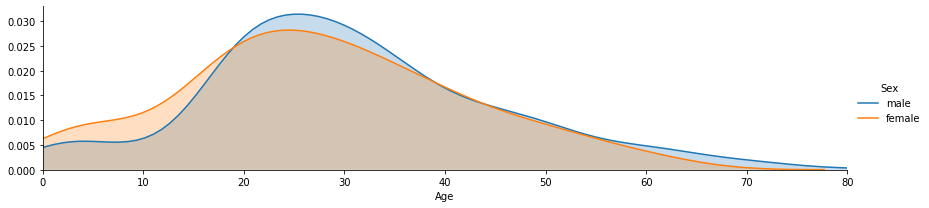

In [8]:
# Visualise female vs.male 
fig = sns.FacetGrid(train_df, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = train_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

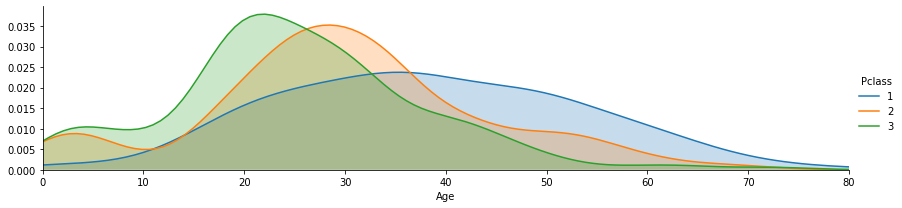

In [9]:
# Visualise 'Age' vs 'Pclass' (1st/2nd/3rd class)
fig = sns.FacetGrid(train_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = train_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

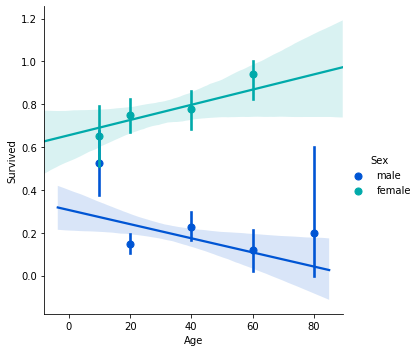

In [10]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Sex',data=train_df,palette='winter',x_bins=generations)

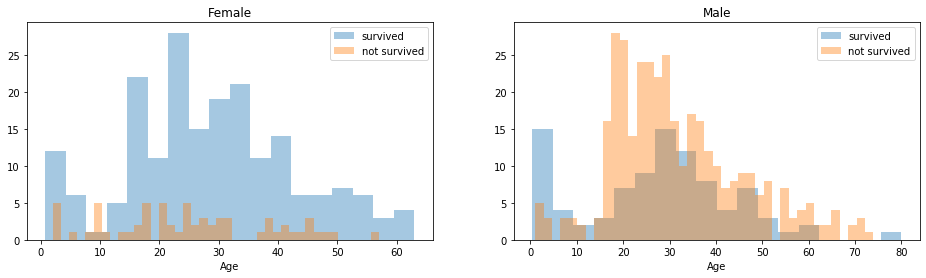

In [11]:
# Visualise overall survived / not survived female vs male dependent on 'Age'
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
men = train_df[train_df['Sex']=='male']
women = train_df[train_df['Sex']=='female']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Women show an overall very high chance of survival across all age groups. 
Men on the other side, seem to have had the highest chance of survival below the age of 5 and between 18 and 35 years old. Overall, men show a much lower chance of survival than women.

# 2. Embarked, Pclass and Sex

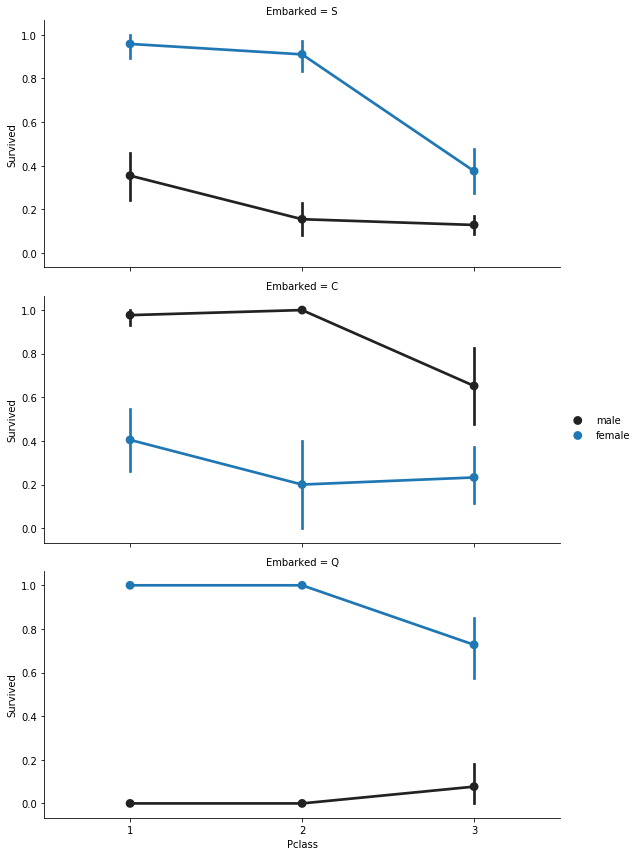

In [12]:
# Visualise port of embarkation and Pclass for females vs males
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4, aspect=2)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival rate, depending on 'Sex'. 
Women that embarked in port Q and S have a higher chance of survial.
Men show a higher rate of survival when they embarked in port C.
Furthermore, Pclass also seems to be correlated with survival

# 3. Pclass

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


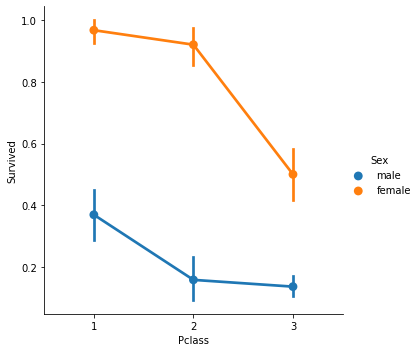

In [13]:
# Visualise 'PClass' vs. 'Survived'
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)

The visualisation clearly shows that a persons Pclass was a decisive factor that contributed either positively or negatively to their survival. 1st class passengers show a much higher chance of survival than 3rd class passengers.

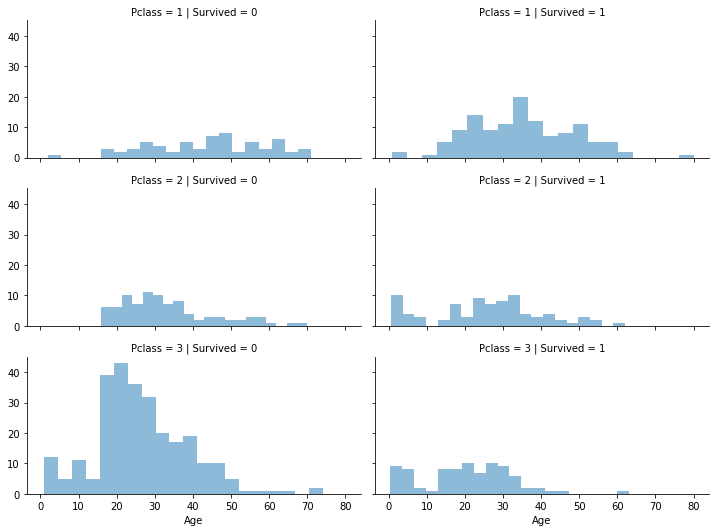

In [14]:
# Visualise 'PClass' vs. 'Survived' vs. 'Age'
# Survived = 0; perished
# Survived = 1; survived
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass',height=2.5,aspect=2)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend();

Above visualisation confirms that passengers in 1st class had a high probability of survival, while passengers in 3rd class had a low probability of survival.

# 4. SibSp and Parch

Combine SibSP and Parch to see the total number of relatives a person had on the ship.

In [15]:
# 0 indicates person with at least 1 relative on the ship
# 1 indicates person with no relatives on the ship
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

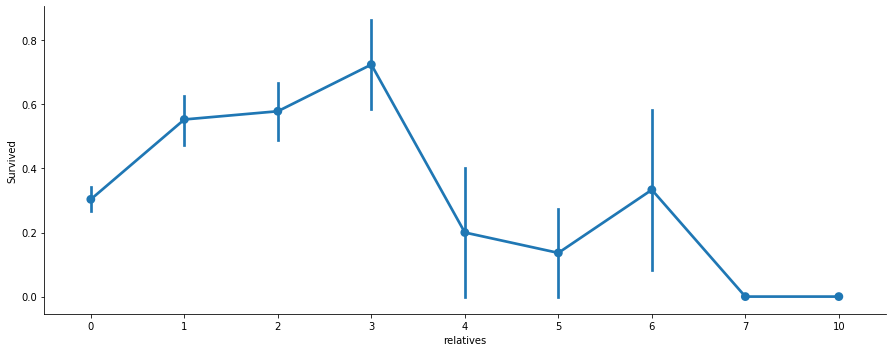

In [16]:
# Visualise
axes = sns.factorplot('relatives','Survived',data=train_df,aspect = 2.5)

Combined relative data shows that persons with 1 to 3 relatives had a substantially higher chance of survival than persons with either no relatives or more than 3 relatives on the ship.

# 5. Summary

We started this machine learning challenge with the exploration of the respective data, followed by its statistical description as well as checked for missing data which may deter accuracy. Seaborn and matplotlib were subsequently used to create meaningful data visualisations. 

Concluding, the highest chance of survial could be observed by women in the 1st class, aged 15 and above, embarked in port S or Q and traveling on the ship with a total amount of 3 relatives.

Conversely, the lowest chance of survival could be observed by men in the 3rd class, aged between 15 and 75, embarked in port S or Q and traveling single or with a total amount of 4 or more relatives. 